In [2]:
from sklearn import model_selection
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [6]:
df = pd.read_csv('final_data2.csv',sep=';')
df = pd.DataFrame(df)

In [61]:
#Supression des variables redondantes
df2 = df.drop(['BSP_3s','Unnamed: 0','Date','Hour','Selected_Speed_Over_Ground','TWS_1m','X.VMG','X.pol','TWA_1m','Longitude','Latitude','TWA_3s','Wind_Direction','BSP_pol','BSP_1m','TWS_3s'],axis=1)

In [14]:
#Supression des colonnes avec trop de Nan
for x in df : 
    if df[x].isnull().sum(axis = 0) > 1000:
        df = df.drop([x],axis=1)
        

In [17]:
#Supression des NA
df = df.dropna()

In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
#Définition de x et y, Stabilité de la boat_Speed en y et toutes les autres variables en x
y = df['Stab_Bsp']
x = df.drop(['Stab_Bsp'], axis=1)
#Découpage en train et test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [63]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor() #Chose the max_features value from the grid serach method
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
#RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.00025261742013848765

Text(0.5,0,'Relative Importance')

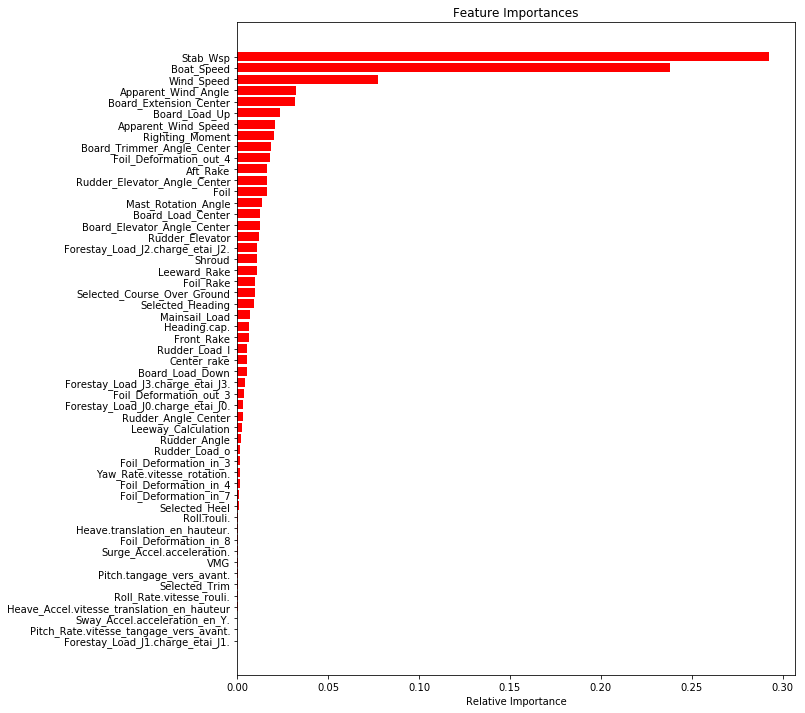

In [66]:
#Grapqhique de l'importance des variables 
import matplotlib.pyplot as plt
features= x.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)
fig = plt.figure(1,figsize = [10,12])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [67]:
#Enregistrement de la figure
fig.savefig('Importance_Stabilite2.jpg',dpi=300)